# fig_10_7_wavelet_PSD

"""
Wavelet transform of Gaussian Noise
-----------------------------------

Figure 10.7

Localized frequency analysis using the wavelet transform. The upper panel shows
the input signal, which consists of localized Gaussian noise. The middle panel
shows an example wavelet. The lower panel shows the power spectral density as a
function of the fr
"""


In [22]:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.fourier import\
    FT_continuous, IFT_continuous, sinegauss, sinegauss_FT, wavelet_PSD


In [23]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [24]:
N=10
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [25]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 7.5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [26]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=18, usetex=True)

# Sample the function: localized noise

In [27]:
#------------------------------------------------------------
# Sample the function: localized noise
np.random.seed(0)

N = 1024
t = np.linspace(-5, 5, N)
x = np.ones(len(t))

h = np.random.normal(0, 1, len(t))
h *= np.exp(-0.5 * (t / 0.5) ** 2)

Text(0, 0.5, 'h(t)')

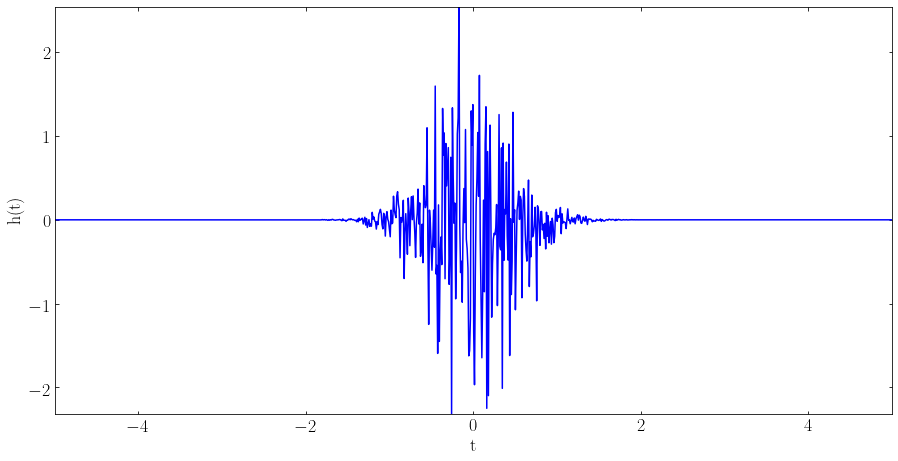

In [28]:
plt.plot(t,h,'b-')
plt.xlabel('t')
plt.ylabel('h(t)')


# Compute an example wavelet

In [29]:
#------------------------------------------------------------
# Compute an example wavelet
W = sinegauss(t, 0, 1.5, Q=1.0)

/Users/dagoret/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'W(t)')

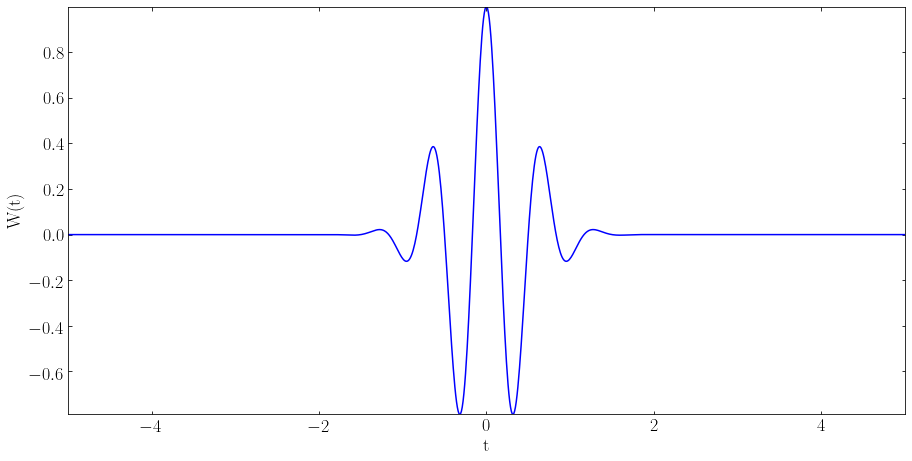

In [30]:
plt.plot(t,W,'b-')
plt.xlabel('t')
plt.ylabel('W(t)')


# Compute an example wavelet

In [31]:
#------------------------------------------------------------
# Compute an example wavelet
W = sinegauss(t, 0, 1.5, Q=10.0)

/Users/dagoret/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'W(t)')

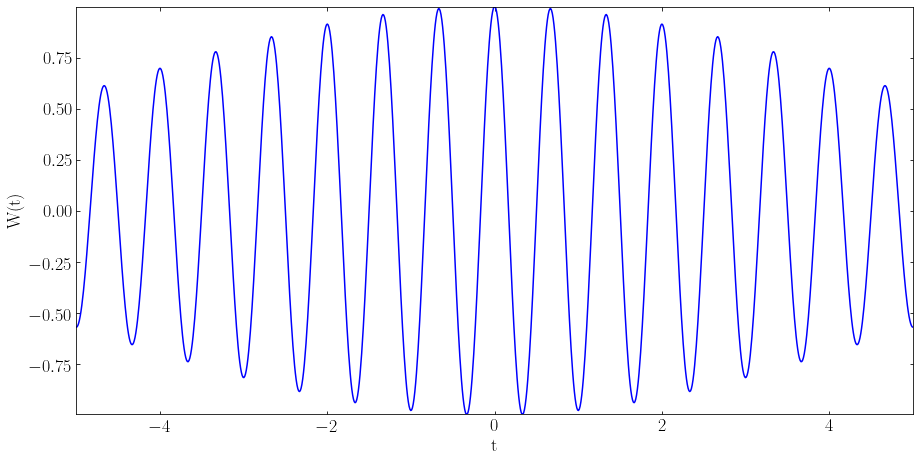

In [32]:
plt.plot(t,W,'b-')
plt.xlabel('t')
plt.ylabel('W(t)')


# Compute the wavelet PSD

In [33]:
#------------------------------------------------------------
# Compute the wavelet PSD
f0 = np.linspace(0.5, 7.5, 100)
wPSD = wavelet_PSD(t, h, f0, Q=1.0)


# Plot the results

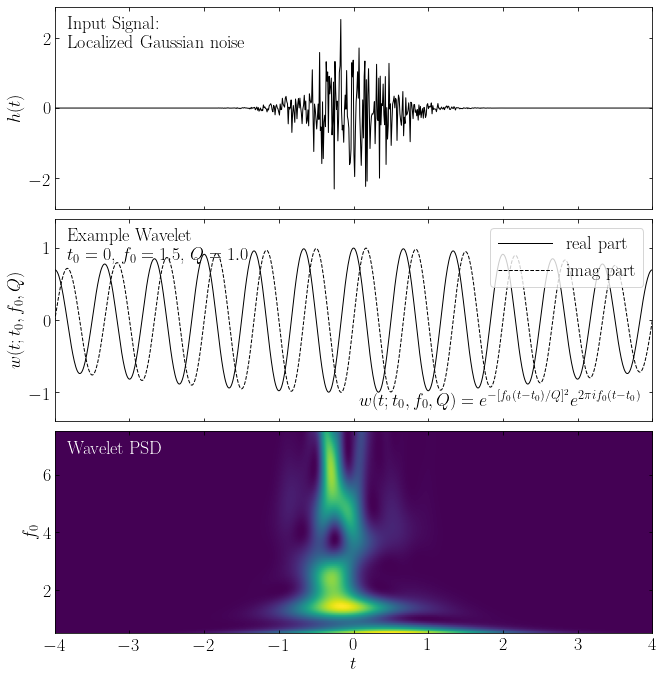

In [34]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.05, left=0.12, right=0.95, bottom=0.08, top=0.95)

# First panel: the signal
ax = fig.add_subplot(311)
ax.plot(t, h, '-k', lw=1)
ax.text(0.02, 0.95, ("Input Signal:\n"
                     "Localized Gaussian noise"),
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlim(-4, 4)
ax.set_ylim(-2.9, 2.9)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_ylabel('$h(t)$')

# Second panel: an example wavelet
ax = fig.add_subplot(312)
ax.plot(t, W.real, '-k', label='real part', lw=1)
ax.plot(t, W.imag, '--k', label='imag part', lw=1)

ax.text(0.02, 0.95, ("Example Wavelet\n"
                     "$t_0 = 0$, $f_0=1.5$, $Q=1.0$"),
        ha='left', va='top', transform=ax.transAxes)
ax.text(0.98, 0.05,
        (r"$w(t; t_0, f_0, Q) = e^{-[f_0 (t - t_0) / Q]^2}"
         "e^{2 \pi i f_0 (t - t_0)}$"),
        ha='right', va='bottom', transform=ax.transAxes)

ax.legend(loc=1)

ax.set_xlim(-4, 4)
ax.set_ylim(-1.4, 1.4)
ax.set_ylabel('$w(t; t_0, f_0, Q)$')
ax.xaxis.set_major_formatter(plt.NullFormatter())

# Third panel: the spectrogram
ax = plt.subplot(313)
ax.imshow(wPSD, origin='lower', aspect='auto',
          extent=[t[0], t[-1], f0[0], f0[-1]])

ax.text(0.02, 0.95, ("Wavelet PSD"), color='w',
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlim(-4, 4)
ax.set_ylim(0.5, 7.5)

ax.set_xlabel('$t$')
ax.set_ylabel('$f_0$')

plt.show()
